In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid

In [2]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

In [3]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train and forecast data
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

In [4]:
import pandas as pd
df = pd.read_csv('data/daily_data.csv', parse_dates=True, index_col=0)

In [5]:
df.head()

,y,Voltage,Global_reactive_power,Kitchen,Laundry_Room,Water_Heater_AC
Datetime,,,,,,
2006-12-16,20.152933,236.243763,0.088187,0.0,546.0,4926.0
2006-12-17,56.507667,240.087028,0.156949,2033.0,4187.0,13341.0
2006-12-18,36.730433,241.231694,0.112356,1063.0,2621.0,14018.0
2006-12-19,27.769900,241.999313,0.104821,839.0,7602.0,6197.0
2006-12-20,37.095800,242.308063,0.111804,0.0,2648.0,14063.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   y                      1442 non-null   float64
 1   Voltage                1442 non-null   float64
 2   Global_reactive_power  1442 non-null   float64
 3   Kitchen                1442 non-null   float64
 4   Laundry_Room           1442 non-null   float64
 5   Water_Heater_AC        1442 non-null   float64
dtypes: float64(6)
memory usage: 78.9 KB


In [7]:
# Split the Data into training and test
test_days = 30 # Number of days to reserve for testing
train, test = df.iloc[:-test_days], df.iloc[-test_days:]
test

,y,Voltage,Global_reactive_power,Kitchen,Laundry_Room,Water_Heater_AC
Datetime,,,,,,
2010-10-28,24.388767,246.253896,0.130028,1103.0,2627.0,9087.0
2010-10-29,20.073700,245.743104,0.135917,1075.0,726.0,3911.0
2010-10-30,35.878333,243.267368,0.135639,2353.0,614.0,15303.0
2010-10-31,24.607167,245.495278,0.144501,1430.0,678.0,5589.0
2010-11-01,23.053000,246.379597,0.129921,0.0,634.0,8746.0
2010-11-02,19.851367,245.786917,0.129528,0.0,574.0,5784.0
2010-11-03,21.554967,244.278535,0.122406,1021.0,1108.0,6529.0
2010-11-04,42.585767,243.152229,0.175304,6029.0,11193.0,10286.0
2010-11-05,28.934800,243.775035,0.125346,0.0,790.0,12610.0


In [8]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# 'seasonal=False' indicates that the model should not consider seasonal components.
model = auto_arima(train['y'],
                   seasonal = False)
model.summary()

c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\ut

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1412
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -4756.902
Date:                Sun, 01 Jun 2025   AIC                           9533.803
Time:                        20:37:32   BIC                           9586.324
Sample:                             0   HQIC                          9553.429
                               - 1412                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0199      0.054     -0.367      0.714      -0.126       0.087
ar.L1         -0.1317      0.028     -4.728      0.000      -0.186      -0.077
ar.L2         -0.8819      0.030    -29.020      0.000      -0.941      -0.822
ar.L3          0.3091      0.044      7.047      0.000       0.223       0.395
ar.L4         -0.0217      0.029     -0.738      0.460      -0.079       0.036
ar.L5          0.0176      0.026      0.676      0.499      -0.033       0.069
ma.L1         -0.4763      0.020    -23.532      0.000      -0.516      -0.437
ma.L2          0.5848      0.017     34.032      0.000       0.551       0.618
ma.L3         -0.8431      0.022    -38.334      0.000      -0.886      -0.800
sigma2        50.2430      1.369     36.708      0.000      47.560      52.926
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               435.97
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Use the fitted ARIMA model to forecast future values.
# set the number of periods to forecast to the length of 'test'
predictions_arima = model.predict(n_periods = len(test))
predictions_arima = pd.Series(predictions_arima, index=test.index)
predictions_arima

c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Datetime
2010-10-28    25.555302
2010-10-29    26.065835
2010-10-30    25.861133
2010-10-31    26.647348
2010-11-01    26.855853
2010-11-02    26.120896
2010-11-03    26.270390
2010-11-04    26.922739
2010-11-05    26.467147
2010-11-06    25.997741
2010-11-07    26.626922
2010-11-08    26.785723
2010-11-09    26.066241
2010-11-10    26.197703
2010-11-11    26.822154
2010-11-12    26.389235
2010-11-13    25.934660
2010-11-14    26.533930
2010-11-15    26.690889
2010-11-16    26.001631
2010-11-17    26.121567
2010-11-18    26.721222
2010-11-19    26.310591
2010-11-20    25.870697
2010-11-21    26.441494
2010-11-22    26.596481
2010-11-23    25.936212
2010-11-24    26.045340
2010-11-25    26.621119
2010-11-26    26.231669
dtype: float64

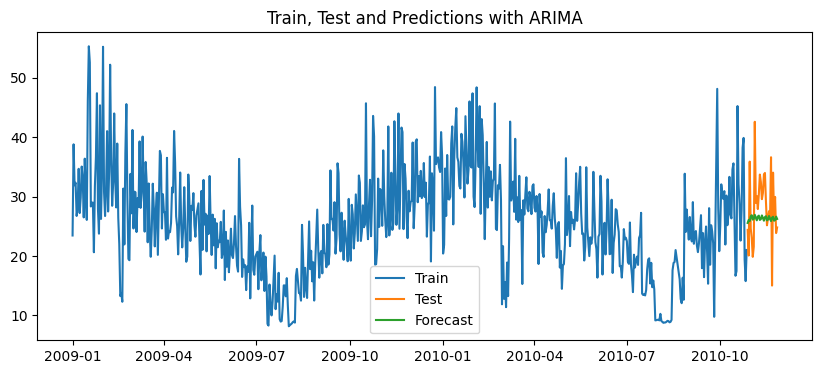

The MAE is 4.66
The RMSE is 5.98
The MAPE is 16.71 %


In [10]:
# Model assessment
model_assessment(train['y']['2009':], test['y'], predictions_arima, "ARIMA")

### SARIMA

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.deprecation")

In [12]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# m = The number of periods in each season.
model_sarima = auto_arima(train['y'],
                          m = 7)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1412
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -4745.168
Date:                             Sun, 01 Jun 2025   AIC                           9500.335
Time:                                     20:38:34   BIC                           9526.595
Sample:                                          0   HQIC                          9510.148
                                            - 1412                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6126      0.020    -30.689      0.000      -0.652      -0.573
ma.L2         -0.1995      0.020     -9.758      0.000      -0.240      -0.159
ar.S.L7        0.9841      0.006    166.427      0.000       0.972       0.996
ma.S.L7       -0.9182      0.016    -58.662      0.000      -0.949      -0.888
sigma2        48.6345      1.246     39.024      0.000      46.192      51.077
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               509.73
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Use the fitted SARIMA model to forecast future values.
# set the number of periods to forecast to the length of 'test'
predictions_sarima = model_sarima.predict(n_periods = len(test))
predictions_sarima = pd.Series(predictions_sarima, index=test.index)
predictions_sarima

Datetime
2010-10-28    24.792369
2010-10-29    25.803474
2010-10-30    26.295605
2010-10-31    27.302561
2010-11-01    27.171495
2010-11-02    26.669005
2010-11-03    26.368318
2010-11-04    25.751699
2010-11-05    26.006186
2010-11-06    26.490477
2010-11-07    27.481394
2010-11-08    27.352416
2010-11-09    26.857930
2010-11-10    26.562032
2010-11-11    25.955236
2010-11-12    26.205669
2010-11-13    26.682246
2010-11-14    27.657377
2010-11-15    27.530454
2010-11-16    27.043845
2010-11-17    26.752661
2010-11-18    26.155531
2010-11-19    26.401975
2010-11-20    26.870960
2010-11-21    27.830558
2010-11-22    27.705657
2010-11-23    27.226799
2010-11-24    26.940253
2010-11-25    26.352635
2010-11-26    26.595153
dtype: float64

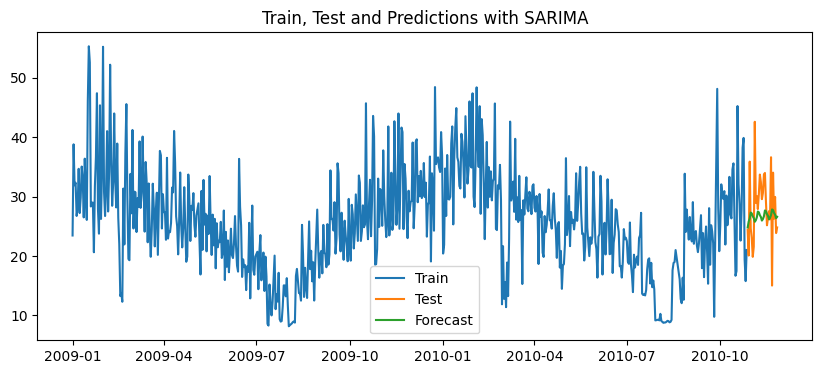

The MAE is 4.59
The RMSE is 5.95
The MAPE is 16.74 %


In [14]:
model_assessment(train['y']['2009':], test['y'], predictions_sarima, "SARIMA")

### SARIMAX

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   y                      1442 non-null   float64
 1   Voltage                1442 non-null   float64
 2   Global_reactive_power  1442 non-null   float64
 3   Kitchen                1442 non-null   float64
 4   Laundry_Room           1442 non-null   float64
 5   Water_Heater_AC        1442 non-null   float64
dtypes: float64(6)
memory usage: 78.9 KB


In [16]:
# Split the Regressor Data into training and test
test_days = 30 # Number of days to reserve for testing
exog_train, exog_test = df.iloc[:-test_days,1:6], df.iloc[-test_days:,1:6]
exog_test.head()

,Voltage,Global_reactive_power,Kitchen,Laundry_Room,Water_Heater_AC
Datetime,,,,,
2010-10-28,246.253896,0.130028,1103.0,2627.0,9087.0
2010-10-29,245.743104,0.135917,1075.0,726.0,3911.0
2010-10-30,243.267368,0.135639,2353.0,614.0,15303.0
2010-10-31,245.495278,0.144501,1430.0,678.0,5589.0
2010-11-01,246.379597,0.129921,0.0,634.0,8746.0


In [17]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# m = The number of periods in each season.
# X =  exogenous variables.
model_sarimax = auto_arima(train['y'],
                           m = 7,
                           X = exog_train)
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1412
Model:             SARIMAX(0, 1, 2)x(2, 0, [], 7)   Log Likelihood               -3883.946
Date:                            Sun, 01 Jun 2025   AIC                           7787.892
Time:                                    20:39:21   BIC                           7840.413
Sample:                                12-16-2006   HQIC                          7807.518
                                     - 10-27-2010                                         
Covariance Type:                              opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Voltage                  -1.2587      0.072    -17.522      0.000      -1.400      -1.118
Global_reactive_power    35.9383      4.198      8.561      0.000      27.711      44.166
Kitchen                   0.0013   6.87e-05     18.432      0.000       0.001       0.001
Laundry_Room              0.0011    4.6e-05     23.473      0.000       0.001       0.001
Water_Heater_AC           0.0011    2.9e-05     38.596      0.000       0.001       0.001
ma.L1                    -0.5596      0.014    -39.468      0.000      -0.587      -0.532
ma.L2                    -0.1823      0.016    -11.727      0.000      -0.213      -0.152
ar.S.L7                   0.0112      0.016      0.680      0.496      -0.021       0.043
ar.S.L14                  0.1167      0.014      8.439      0.000       0.090       0.144
sigma2                   13.5388      0.207     65.556      0.000      13.134      13.944
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):             10444.84
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Use the fitted SARIMAX model to forecast future values.
# set the number of periods to forecast to the length of 'test'
# X - representing the exogenous variables for forecasting
predictions_sarimax = model_sarimax.predict(n_periods = len(test),
                                            X = exog_test)
predictions_sarimax = pd.Series(predictions_sarimax, index=test.index)
predictions_sarimax

Datetime
2010-10-28    23.243932
2010-10-29    15.560858
2010-10-30    32.565483
2010-10-31    18.430642
2010-11-01    18.495715
2010-11-02    16.290432
2010-11-03    20.662891
2010-11-04    45.479652
2010-11-05    26.433622
2010-11-06    34.377793
2010-11-07    27.779144
2010-11-08    34.618833
2010-11-09    35.384486
2010-11-10    39.441364
2010-11-11    30.909514
2010-11-12    31.602900
2010-11-13    34.022582
2010-11-14    34.848611
2010-11-15    31.331557
2010-11-16    22.989411
2010-11-17    25.440369
2010-11-18    29.487533
2010-11-19    28.606818
2010-11-20    36.322552
2010-11-21    19.129680
2010-11-22    34.798028
2010-11-23    25.797540
2010-11-24    33.180304
2010-11-25    20.208686
2010-11-26    27.774192
dtype: float64

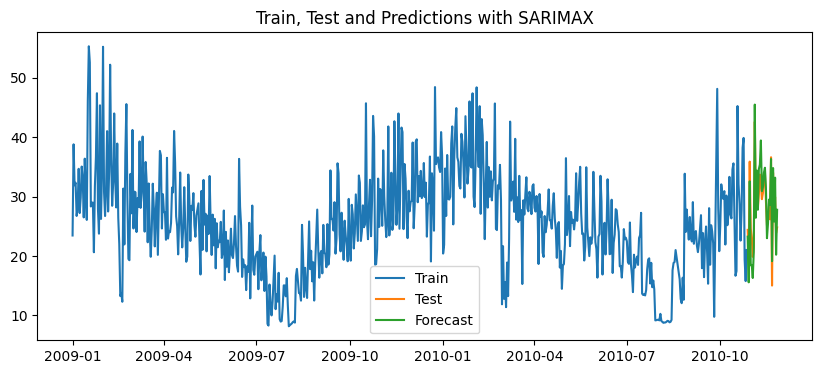

The MAE is 2.52
The RMSE is 3.06
The MAPE is 9.72 %


In [19]:
# Model assessment
model_assessment(train['y']['2009':],test['y'], predictions_sarimax, "SARIMAX")

### Cross Validation

In [20]:
# Define the model to do CV
# order = ([p] autoregressive order, [d] differencing order, [q] moving average order)
# seasonal_order = ([P] seasonal autoregressive order, [D] seasonal differencing order, [Q] seasonal moving average order, [m] number of periods per season)
model_cv = ARIMA(order = (0,1,2), seasonal_order = (2,0,0,7))

In [21]:
# Define the rules for Rolling Forecast Cross-Validation (RollingForecastCV).
cv = model_selection.RollingForecastCV(h = 30, # forecast horizon
                                       step = 15, # moves the validation window by n time steps each iteration
                                       initial = df.shape[0] - 180) # starting point for the first training set

In [22]:
# Perform cross-validation scoring using specified inputs.
cv_score = model_selection.cross_val_score(model_cv,
                                           y=df['y'],  # Target variable 'y'
                                           X=df.iloc[:, 1:6],  # Explanatory variables from columns 1 and 2
                                           scoring='mean_squared_error',  # Evaluation metric: Mean Squared Error
                                           cv=cv,  # Cross-validation strategy
                                           verbose=1,  # Verbosity level
                                           error_score=10000000000000000000000  # Value to assign if fitting error occurs
                                           )


c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\

In [23]:
# Calculate Root Mean Squared Error (RMSE) using cross-validated scores.
rmse = np.sqrt(np.average(cv_score))
print(f"The RMSE is {int(rmse)}")

The RMSE is 4


# Parameter Tuning

In [24]:
# Defining the parameters
param_grid = {'p': [1],
              'd': [0,1],
              'q': [1,2],
              'P': [1,2],
              'D': [0],
              'Q': [0]}
grid = ParameterGrid(param_grid)
len(list(grid))

8

In [25]:
# Initialize an empty list to store RMSE values for each parameter set
rmse_list = []

# Iterate over each set of parameters in the grid
for params in grid:

  # Build an ARIMA model with the current set of parameters
  model = ARIMA(order=(params['p'], params['d'], params['q']),
                seasonal_order=(params['P'], params['D'], params['Q'], 7))

  # Define the Rolling Forecast Cross-Validation strategy
  cv = model_selection.RollingForecastCV(h=30,
                                         step=15,
                                         initial=df.shape[0] - 180)

  # Perform cross-validation scoring with the ARIMA model
  cv_score = model_selection.cross_val_score(model,
                                             y=df['y'],  # Target variable 'y'
                                             X=df.iloc[:, 1:3],  # Explanatory variables from columns 1 and 2
                                             scoring='mean_squared_error',  # Evaluation metric: Mean Squared Error
                                             cv=cv,  # Cross-validation strategy
                                             verbose=1,  # Verbosity level
                                             error_score=10000000000000000000000  # Value to assign if fitting error occurs
                                             )

  # Calculate RMSE and store the error
  rmse = np.sqrt(np.average(cv_score))
  rmse_list.append(rmse)


c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\Elec

In [26]:
# Create a DataFrame to store the tuning results with parameters and corresponding RMSE values
tuning_results = pd.DataFrame(grid)

# Add the RMSE values calculated during parameter tuning to the DataFrame
tuning_results['rmse'] = rmse_list

tuning_results

,D,P,Q,d,p,q,rmse
0,0,1,0,0,1,1,7.414889
1,0,1,0,0,1,2,7.197887
2,0,1,0,1,1,1,8.019577
3,0,1,0,1,1,2,8.031114
4,0,2,0,0,1,1,7.448007
5,0,2,0,0,1,2,7.224503
6,0,2,0,1,1,1,7.970893
7,0,2,0,1,1,2,8.013247


In [27]:
# Save the best parameters
best_params = tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()].transpose()
best_params

,1
D,0.000000
P,1.000000
Q,0.000000
d,0.000000
p,1.000000
q,2.000000
rmse,7.197887


# Predicting the future

In [28]:
# Fetch the best parameters
p = int(best_params.loc['p'].iloc[0])
d = int(best_params.loc['d'].iloc[0])
q = int(best_params.loc['q'].iloc[0])
P = int(best_params.loc['P'].iloc[0])
D = int(best_params.loc['D'].iloc[0])
Q = int(best_params.loc['Q'].iloc[0])

In [32]:
tuned_model = ARIMA(order = (p, d, q),
                    seasonal_order = (P, D, Q, 7))

tuned_model.fit(y=train['y'], X=exog_train)

c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouad\OneDrive\Desktop\ElectricityForcast\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(1, 0, 2), seasonal_order=(1, 0, 0, 7))

In [36]:
predictions = tuned_model.predict(n_periods = len(test),
                                            X = exog_test)

predictions = pd.Series(predictions, index=test.index)

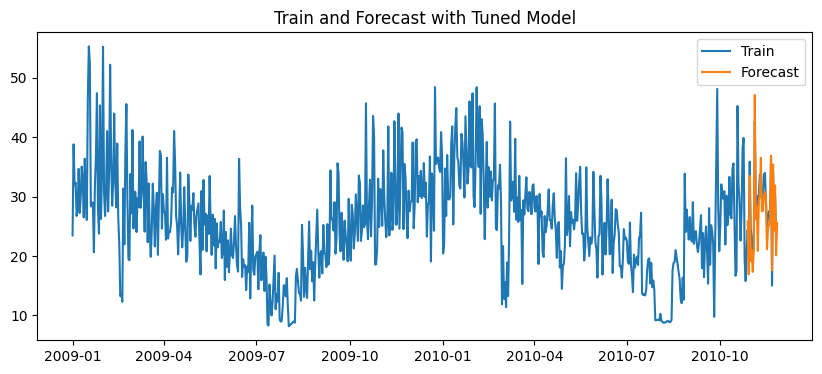

In [37]:
# Data Visualization
plot_future(df["y"]['2009':], predictions, "Tuned Model")